### R.YUVARAJ

### 225229149

### Lab6 : Multi-class Classification of Fashion Apparels using DNN

### step 1

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
data= tf.keras.datasets.fashion_mnist.load_data()
data

4422102/4422102 [==============================] - 2s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### step 2

In [2]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

Defaulting to user installation because normal site-packages is not writeable


In [3]:
X_train.size

47040000

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.size

60000

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.size

7840000

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.size

10000

In [10]:
y_test.shape

(10000,)

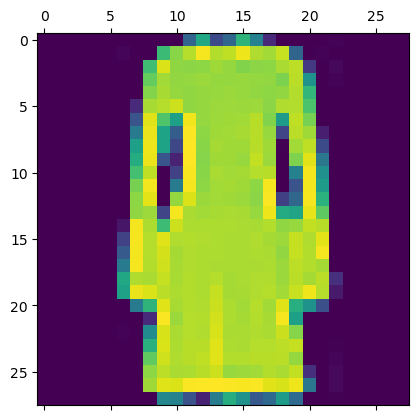

In [11]:
import matplotlib.pyplot as plt
plt.matshow(X_train[49])
plt.show()

### step 3

In [12]:
X_train_n=X_train / 255.0
X_test_n=X_test / 255.0

### step 4

In [19]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
model = Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),Dense(512, activation='relu'),Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_n, y_train, epochs=10, batch_size=32, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(X_test_n,y_test)
print(f"Test accuracy: {test_accuracy}")
model.save("baseline_model.h5")

Epoch 1/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4804 - accuracy: 0.8295 - val_loss: 0.3991 - val_accuracy: 0.8560
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3627 - accuracy: 0.8679 - val_loss: 0.3820 - val_accuracy: 0.8647
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3272 - accuracy: 0.8802 - val_loss: 0.3425 - val_accuracy: 0.8768
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2997 - accuracy: 0.8889 - val_loss: 0.3188 - val_accuracy: 0.8888
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2798 - accuracy: 0.8965 - val_loss: 0.3541 - val_accuracy: 0.8750
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2683 - accuracy: 0.9002 - val_loss: 0.3139 - val_accuracy: 0.8858
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2546 - accuracy: 0.9044 - val_loss: 0.3167 - val_ac

### step 5

In [22]:
import time
def build_train_model(nodes, num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    start_time = time.time()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
    training_time = time.time() - start_time
    _, test_accuracy = model.evaluate(X_test, y_test)
    return model.count_params(), model.evaluate(X_train, y_train)[1], test_accuracy, training_time

In [23]:
configurations = [
 (32, 1),
 (8, 1),
 (6, 1),
 (32, 1),
 (64, 1),
 (128, 1),
 (256, 1),
 (512, 1),
 (1024, 1),
 (32, 2),
 (32, 3),
 (32, 4),
 (32, 5)
]
num_parameters_list = []
training_accuracy_list = []
testing_accuracy_list = []
running_time_list = []
for nodes, num_layers in configurations:
    num_params, train_acc, test_acc, runtime = build_train_model(nodes, num_layers)
    num_parameters_list.append(num_params)
    training_accuracy_list.append(train_acc)
    testing_accuracy_list.append(test_acc)
    running_time_list.append(runtime)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3484 - accuracy: 0.8763


Best Configuration:
Nodes: 32, Number of Layers: 5
Testing Accuracy: 0.8579999804496765


<Figure size 1200x600 with 0 Axes>

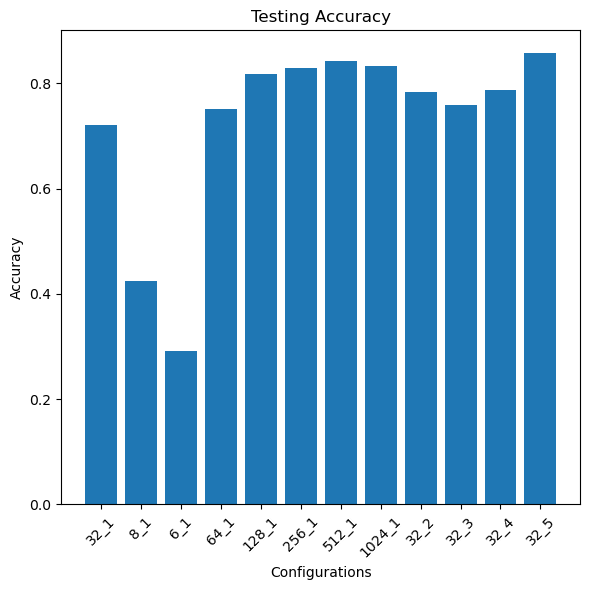

In [25]:
# Plotting the results in bar charts
import numpy as np
x_labels = [f"{nodes}_{num_layers}" for nodes, num_layers in configurations]
plt.figure(figsize=(12, 6))
# Find the index of the maximum testing accuracy
best_config_index = np.argmax(testing_accuracy_list)
# Get the best configuration parameters
best_nodes, best_num_layers = configurations[best_config_index]
print("Best Configuration:")
print(f"Nodes: {best_nodes}, Number of Layers: {best_num_layers}")
print(f"Testing Accuracy: {testing_accuracy_list[best_config_index]}")
# Plotting the results for the best configuration
plt.figure(figsize=(6, 6))
plt.bar(x_labels, testing_accuracy_list)
plt.xticks(rotation=45)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Configurations')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
# Create a DataFrame to store the results
results_df = pd.DataFrame({
 'Configuration': x_labels,
 'Parameters Learned': num_parameters_list,
 'Training Accuracy': training_accuracy_list,
 'Testing Accuracy': testing_accuracy_list,
 'Running Time (s)': running_time_list
})
# Print the DataFrame
print(results_df)
# Get the index of the best configuration
best_config_index = np.argmax(testing_accuracy_list)
best_config = results_df.iloc[best_config_index]
print("\nBest Configuration:")
print(best_config)

   Configuration  Parameters Learned  Training Accuracy  Testing Accuracy  \
0           32_1               25450           0.728333            0.7207   
1            8_1                6370           0.424983            0.4249   
2            6_1                4780           0.293733            0.2907   
3           32_1               25450           0.651483            0.6408   
4           64_1               50890           0.766467            0.7511   
5          128_1              101770           0.833083            0.8186   
6          256_1              203530           0.848117            0.8297   
7          512_1              407050           0.860567            0.8426   
8         1024_1              814090           0.855900            0.8331   
9           32_2               26506           0.798583            0.7832   
10          32_3               27562           0.771783            0.7583   
11          32_4               28618           0.805333            0.7878   

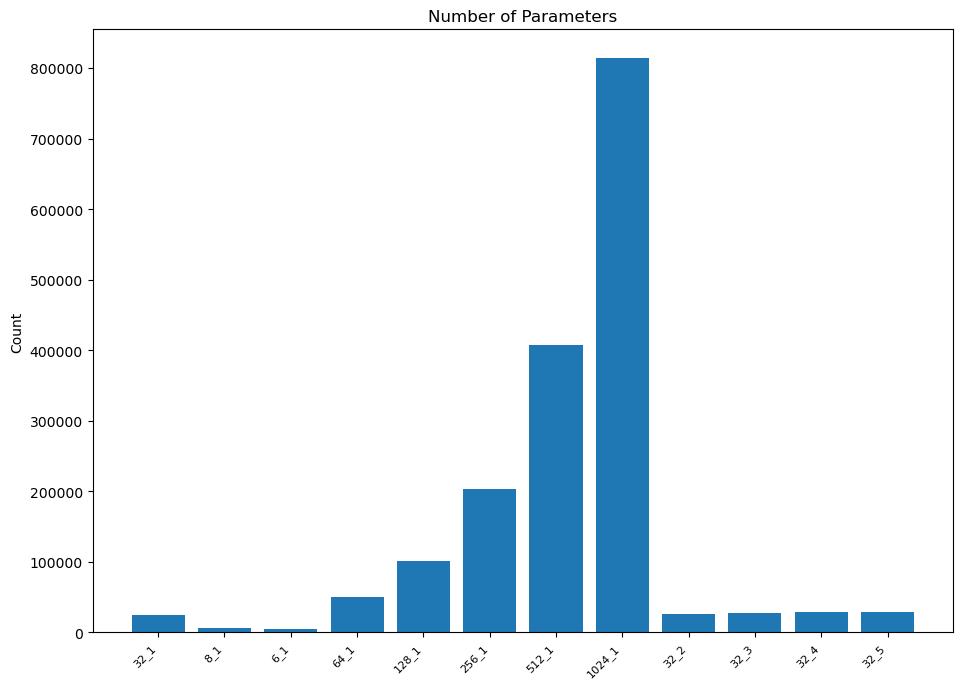

In [27]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))
# Number of parameters plot
plt.subplot(1, 4, 1)
plt.bar(x_labels, num_parameters_list, width=0.8) # Adjust the width value to control the spacing
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate labels for better visibility
plt.title('Number of Parameters')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

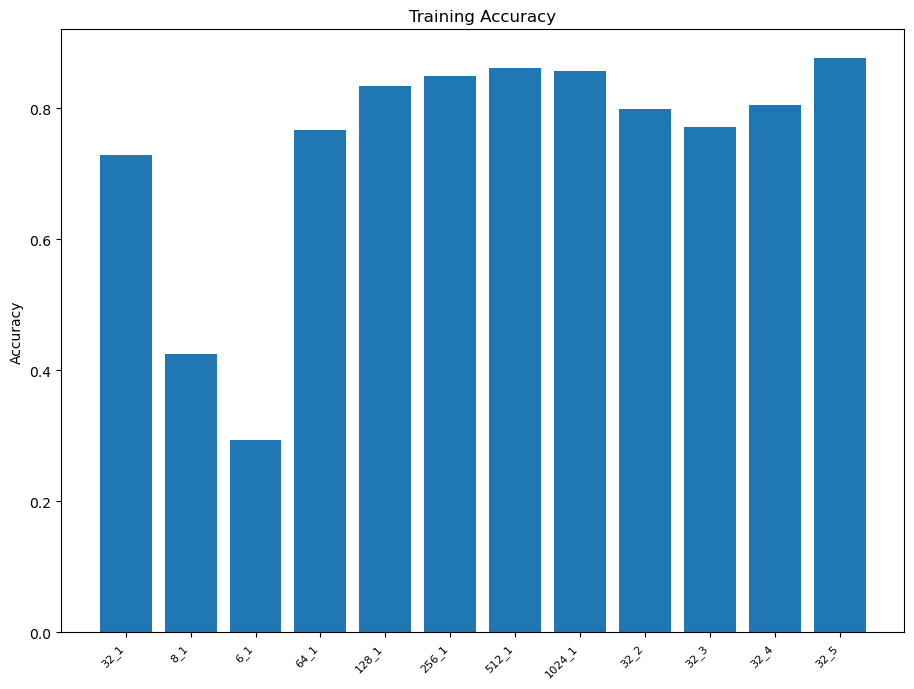

In [28]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))
# Training Accuracy plot
plt.subplot(1, 4, 2)
plt.bar(x_labels, training_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

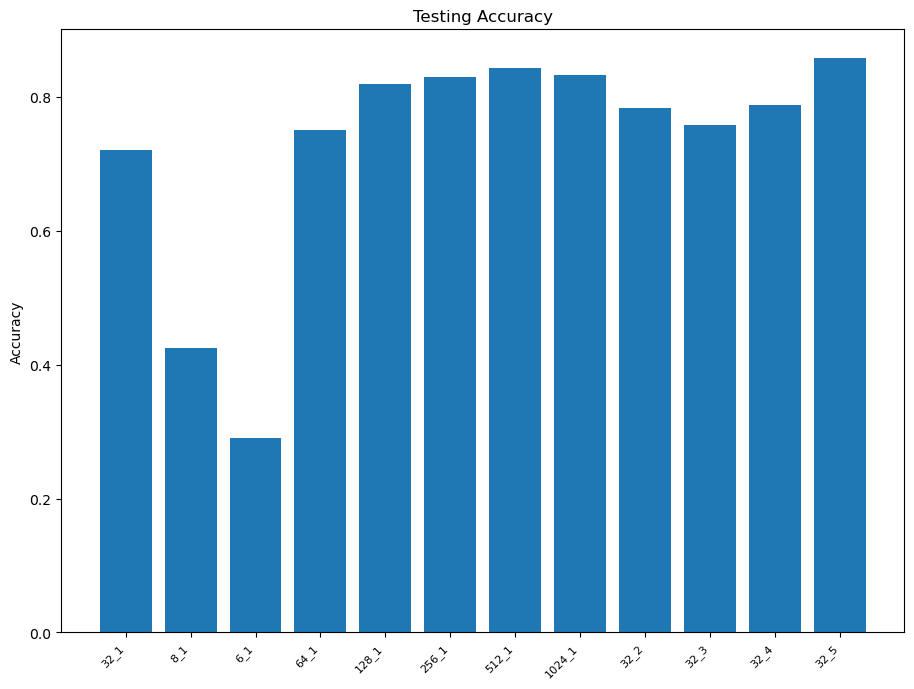

In [29]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))
# Testing Accuracy plot
plt.subplot(1, 4, 3)
plt.bar(x_labels, testing_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

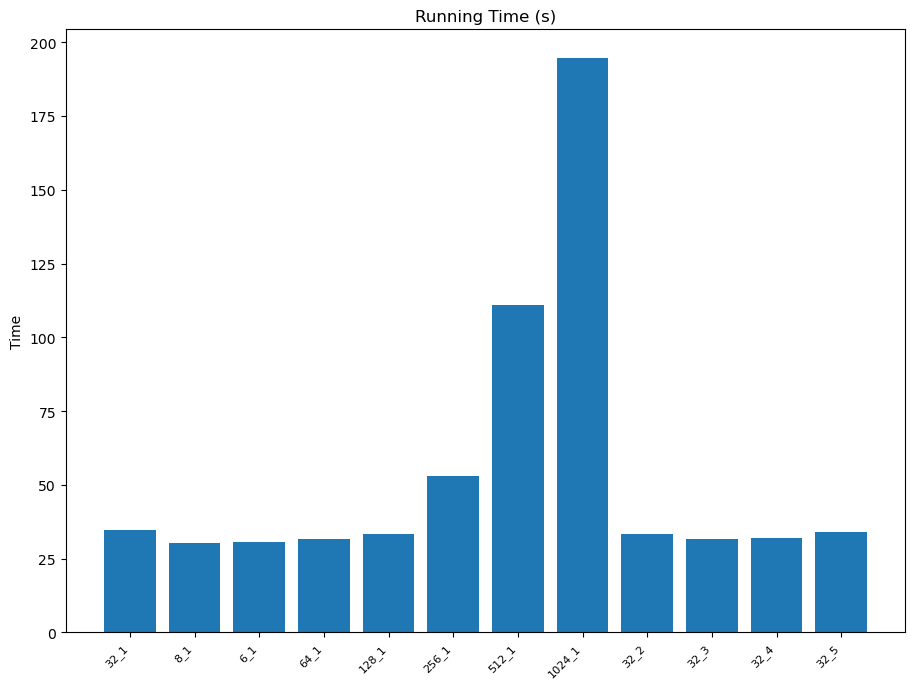

In [30]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))
# Running Time plot
plt.subplot(1, 4, 4)
plt.bar(x_labels, running_time_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Running Time (s)')
plt.ylabel('Time')
plt.tight_layout()
plt.show()